In [1]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from figures.plotting import plot_eigenspectrum
from matplotlib import pyplot as plt

data = pd.read_csv('../results/eigen_spectra.csv')

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,n,Variance,layer,architecture,task,kind,source
0,1,3.969359,layer1.0.relu,ResNet18,None,Untrained,PyTorch
1,2,0.908209,layer1.0.relu,ResNet18,None,Untrained,PyTorch
2,3,0.240686,layer1.0.relu,ResNet18,None,Untrained,PyTorch
3,4,0.146864,layer1.0.relu,ResNet18,None,Untrained,PyTorch
4,5,0.135053,layer1.0.relu,ResNet18,None,Untrained,PyTorch


---
# Untrained vs. Supervised Object Classification

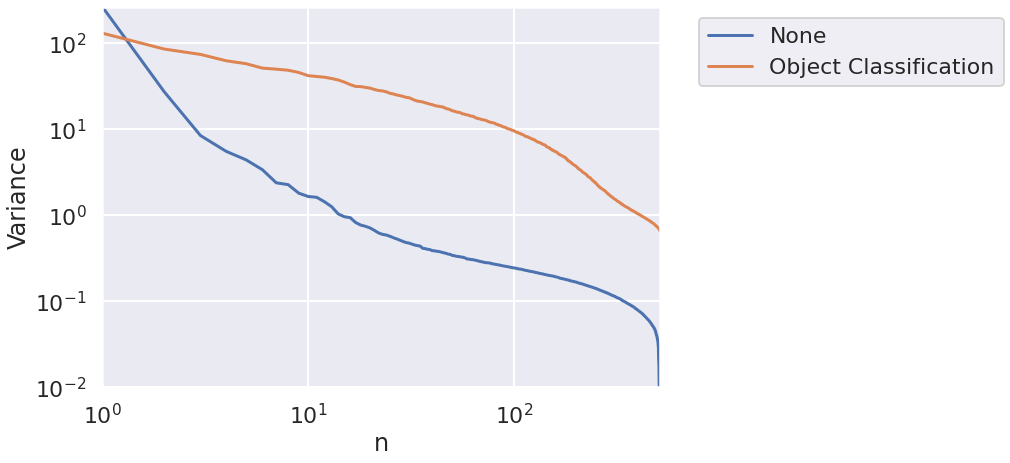

In [19]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]

fig, ax = plt.subplots(figsize=(10, 7))
plot_eigenspectrum(data=results[results.layer == 'layer4.1.relu'], x='n', y='Variance', hue='task', ax=ax)
ax.set_ylim(10e-3, None)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

---
# Yamins Self-Supervised

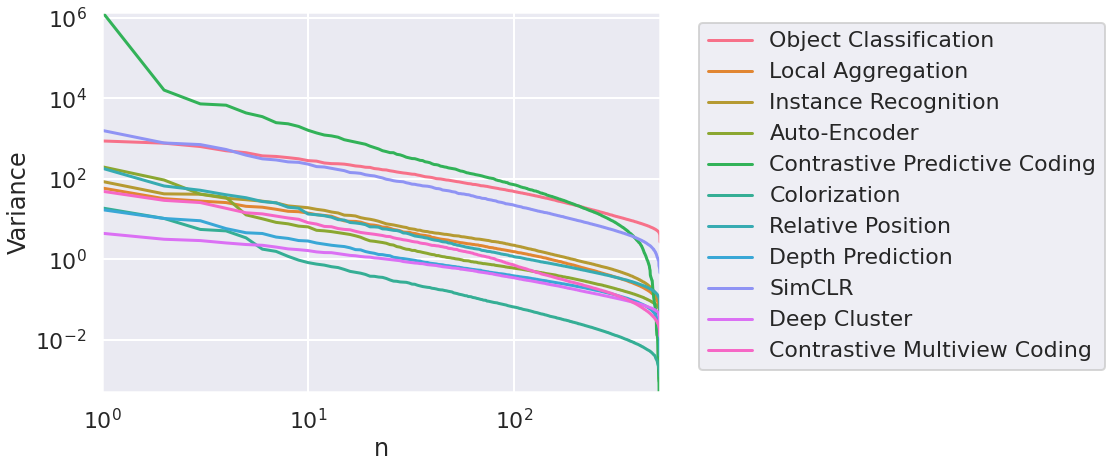

In [12]:
results = data[(data.source == 'VVS')]

fig, ax = plt.subplots(figsize=(10, 7))
plot_eigenspectrum(data=results[results.layer == 'layer4.1.relu'], x='n', y='Variance', hue='task', ax=ax)
ax.set_ylim(5e-4, None)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

---
# Taskonomy

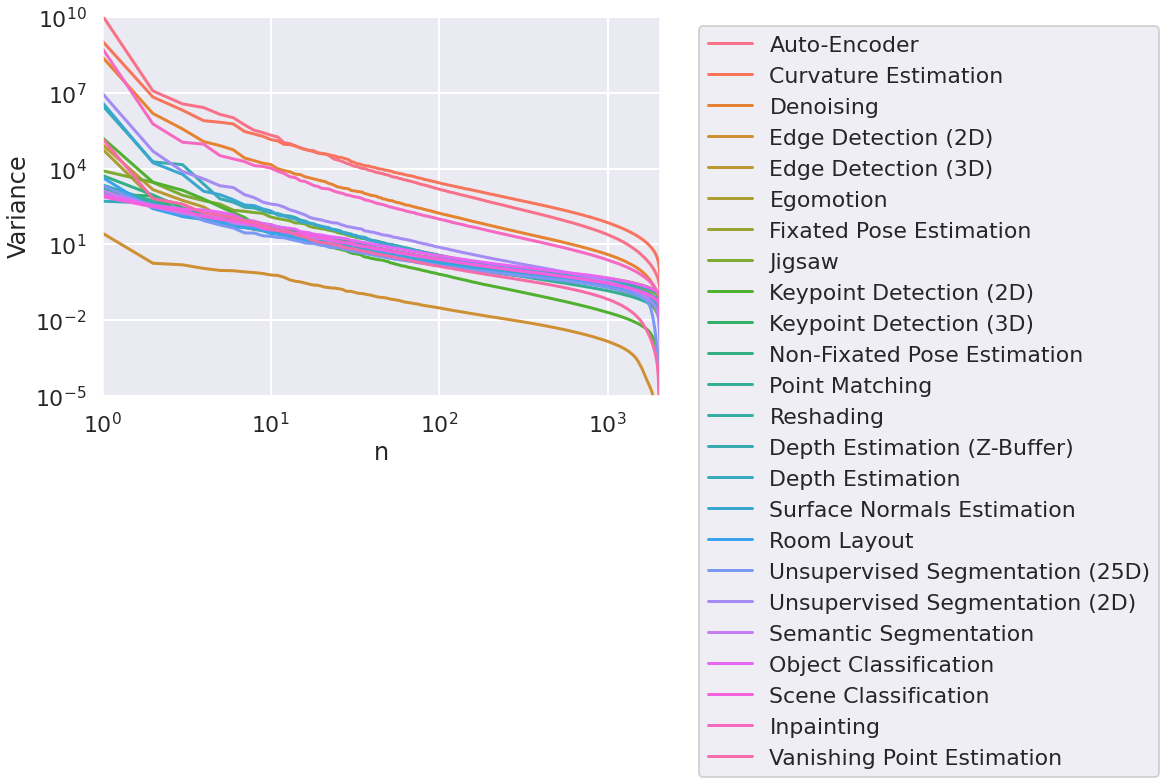

In [30]:
results = data[(data.source == 'Taskonomy')]

fig, ax = plt.subplots(figsize=(10, 7))
plot_eigenspectrum(data=results[results.layer == 'layer4.2.relu'], x='n', y='Variance', hue='task', ax=ax)
ax.set_ylim(10e-6, None)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()